# EDA

**Import train, val, test sets from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive


In [ ]:
import pandas as pd
import polars as pl
from datetime import timedelta
import os

In [ ]:
df_train = pl.read_parquet(os.path.join(drive_path, "df_train.parquet"))
df_val = pl.read_parquet(os.path.join(drive_path, "df_val.parquet"))

In [ ]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly,daily_receiver_transaction,weekly_receiver_transaction,daily_sender_transaction,weekly_sender_transaction,circular_transaction_count
time,date,i64,i64,f64,str,str,str,str,str,i8,i16,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i8,u32,f64,f64,f64,f64,i16,i16,i16,i16,i8
10:35:34,2022-10-07,5606024775,8646193759,7.122552,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,2022,10,7,5,280,10,35,34,0,0,0,0,1,1,1,7.122552,7.122552,1,1,0.352988,1.0,1.0,1.0,1,1,1,1,0
10:36:04,2022-10-07,2004133484,3079818547,8.999083,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,36,4,0,0,0,0,8,1,8,624.297626,98.937884,11,8,0.002648,8.0,1.0,6.309996,68,68,11,11,0
10:36:31,2022-10-07,4082552798,4173195094,9.39055,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,36,31,0,0,0,0,9,1,8,696.723021,112.611058,12,8,0.004816,9.0,1.125,6.186986,74,74,12,12,0
10:37:15,2022-10-07,35328673,1794595555,6.480489,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Debit card""",0,2022,10,7,5,280,10,37,15,0,0,0,0,1,13,1,12.887551,156.293105,1,1,1.946611,0.076923,1.0,0.082458,1,1,1,3,0
10:37:41,2022-10-07,7189128119,4344504728,9.778583,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,37,41,0,0,0,0,1,6,1,9.778583,59.85713,1,1,1.567371,0.166667,1.0,0.163365,1,1,1,1,0


**Correlation matrix**

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features = ["Amount", "year", "month", "day_of_month", "day_of_week", "day_of_year", "hour", "minute", "second",
            "currency_mismatch", "cross_border", "high_risk_sender", "high_risk_receiver",
            "fanin_30d", "fan_in_out_ratio", "fanin_intensity_ratio", "amount_dispersion_std",
            "sent_to_received_ratio_monthly", "back_and_forth_transfers",
            "daily_receiver_transaction", "weekly_receiver_transaction",
            "daily_sender_transaction", "weekly_sender_transaction", "circular_transaction_count",
            "Is_laundering"]

In [ ]:
corr_pl = df_train.select(features).corr()
corr_df = corr_pl.to_pandas()
corr_df.columns = features
corr_df.index = features

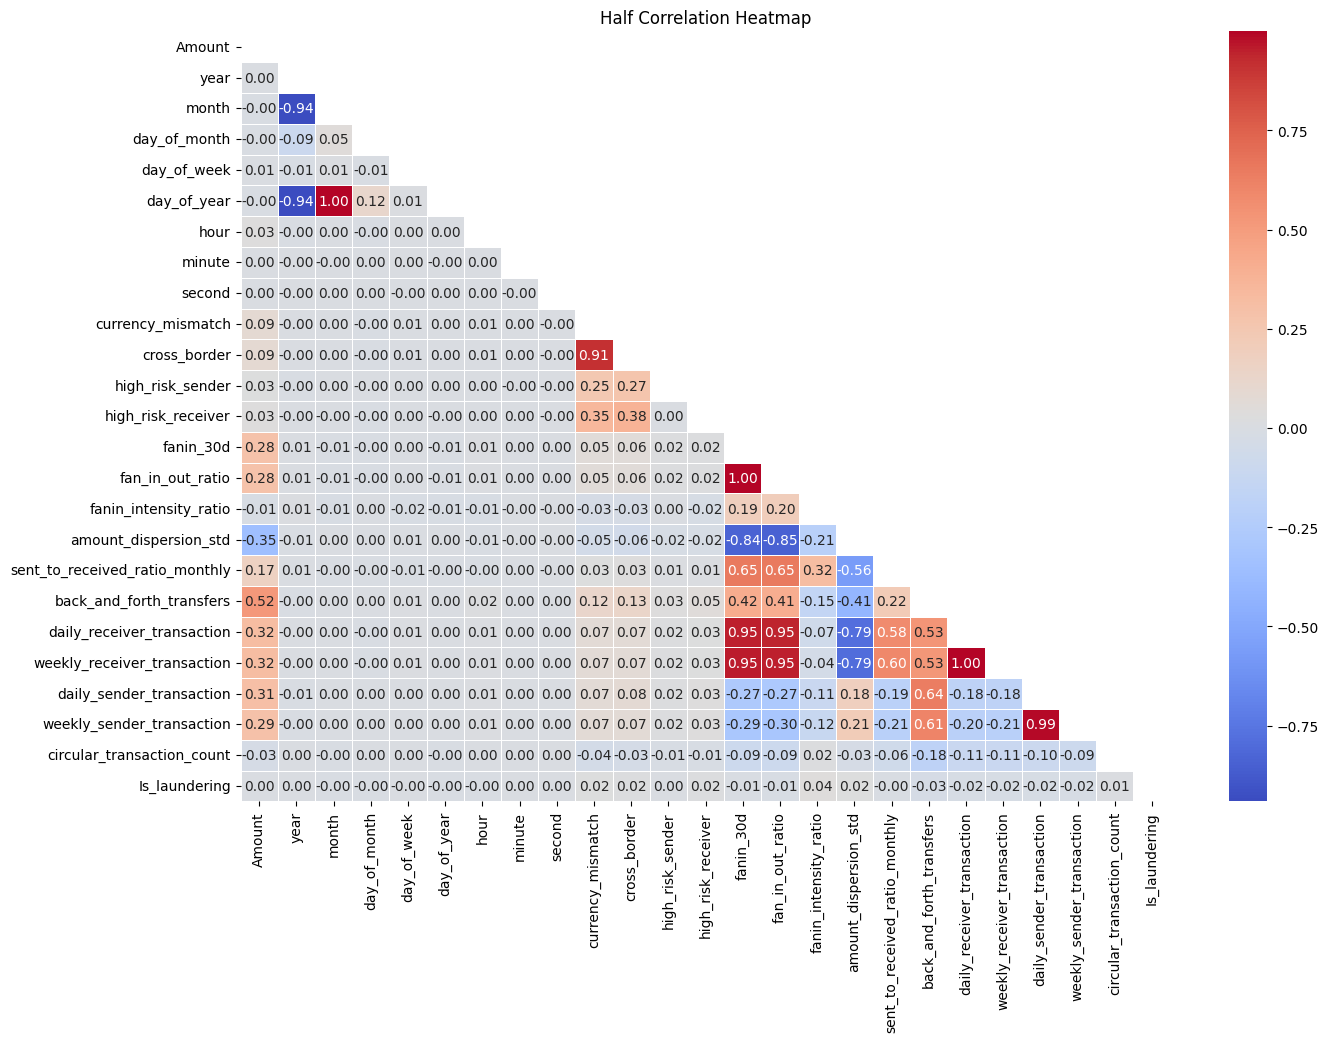

In [ ]:
mask = np.zeros_like(corr_df, dtype=bool) # Use bool for the mask
mask[np.triu_indices_from(mask)] = True

# 4. Draw the heatmap with the mask
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
sns.heatmap(corr_df, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Half Correlation Heatmap')
plt.show()

In [ ]:
df_train["Amount"].describe()

statistic,value
str,f64
"""count""",7.429619e6
"""null_count""",0.0
"""mean""",8.34591
"""std""",1.405114
"""min""",1.316408
"""25%""",7.669038
"""50%""",8.718191
"""75%""",9.253663
"""max""",16.350674


In [ ]:
df_filtered = df_train.filter(pl.col("circular_transaction_count") >= 1)
df_filtered["circular_transaction_count"].describe()

statistic,value
str,f64
"""count""",712823.0
"""null_count""",0.0
"""mean""",4.169808
"""std""",5.084495
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",9.0
"""max""",17.0


In [ ]:
!pip install brokenaxes

In [ ]:
from brokenaxes import brokenaxes

def plot_broken(feature: str):
    if feature == "circular_transaction_count":
        df_filtered = df_train.filter(pl.col(feature) >= 1)
    else:
        df_filtered = df_train.select(feature)

    counts = (
        df_filtered
        .group_by(feature)
        .agg(pl.len().alias("n"))
        .sort("n", descending=True)
    )

    cats = counts[feature].to_list()
    vals = counts["n"].to_list()
    vals_np = np.array(vals)

    p_low, p_high = np.percentile(vals_np, [5, 95])
    margin = 0.05 * (p_high - p_low)

    main_band = (p_low - margin, p_high + margin)
    outliers = vals_np[(vals_np < p_low) | (vals_np > p_high)]

    if len(outliers) > 0:
        outlier_low = outliers.min() - margin
        outlier_high = outliers.max() + margin
        ylims = [main_band, (outlier_low, outlier_high)]
    else:
        ylims = [main_band]

    fig = plt.figure(figsize=(6, 4))
    bax = brokenaxes(ylims=ylims, hspace=0.05)
    bax.bar(cats, vals)
    bax.set_xlabel(feature, fontsize=12, labelpad=30)
    bax.set_ylabel("Count", fontsize=12, labelpad=50)
    bax.set_title(f"{feature} Histogram", fontsize=15)
    plt.show()

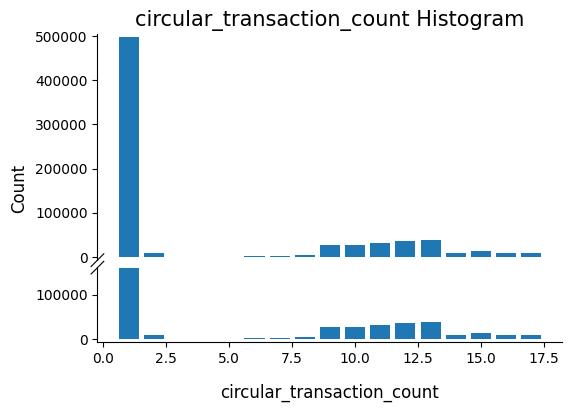

In [ ]:
plot_broken("circular_transaction_count")

In [ ]:
 counts = (
    df_filtered
    .group_by("circular_transaction_count")   # use group_by not groupby
    .agg(pl.len().alias("n"))               # count rows per value
    .sort("n", descending=True)
)

cats = counts["circular_transaction_count"].to_list()
vals = counts["n"].to_list()

In [ ]:
vals

[496850,
 39140,
 35504,
 31705,
 26693,
 26213,
 12963,
 9320,
 9010,
 8657,
 8339,
 3761,
 2522,
 1546,
 457,
 143]

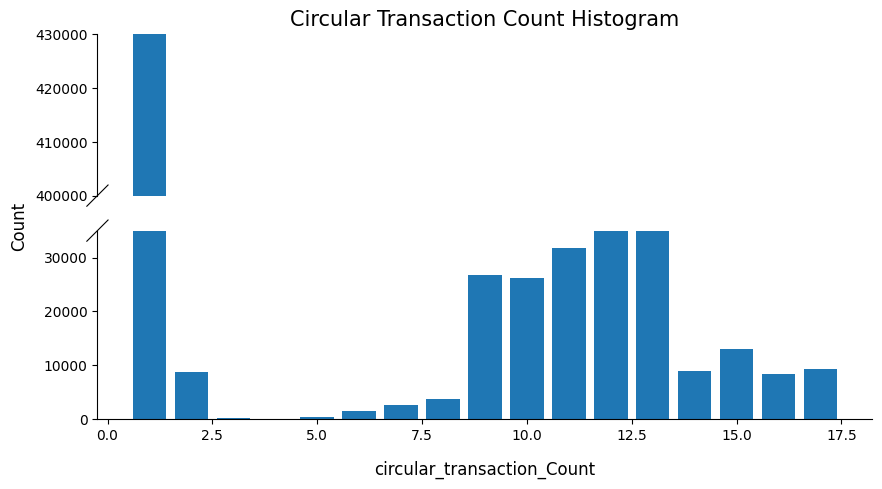

In [ ]:

fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(
    ylims=((0, 35000), (400000, 430000))
)
bax.bar(cats, vals)
bax.set_xlabel("circular_transaction_Count", fontsize=12, labelpad=30)
bax.set_ylabel("Count", fontsize=12, labelpad=50)
bax.set_title("Circular Transaction Count Histogram", fontsize=15)
plt.show()